In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import umap.umap_ as umap
import hdbscan

/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = np.load('../../datasets/unlabelled_train_data_images.npy')
print(data.shape)
print(data.dtype)

display(data[0])


(60000, 1, 28, 28)
float32


array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [3]:
print(data.min())
print(data.max())
print(data.mean())
print(data.std())

0.0
1.0
0.13066055
0.30810788


### Key takeaways
- The images are either greyscale or black and white.
- Since the all values are between 0-1, it is already normalised.

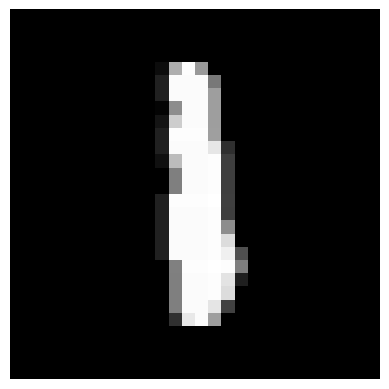

In [4]:
import matplotlib.pyplot as plt
def view_img(df, idx):
    img = df[idx]
    img = img.squeeze()
    plt.imshow(img, cmap='gray')
    # plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

view_img(data, 5)

#### Check data quality

In [5]:
flattened_data = data.reshape(data.shape[0], -1)
print(flattened_data.shape)
display(flattened_data.sum(axis=0))
empty_images = np.sum(flattened_data.sum(axis=1) == 0)
print("Number of completely black images:", empty_images)


(60000, 784)


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.94117647e-01, 1.84313726e+00, 8.47058833e-01, 3.52941193e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.27451017e-02, 2.15686277e-01, 2.18431401e+00, 5.71372604e+00,
       1.02862749e+01, 1.50823536e+01, 2.82666683e+01, 3.78196106e+01,
       4.09843216e+01, 4.17490196e+01, 4.45450935e+01, 4.09764709e+01,
       4.39843216e+01, 3.61529312e+01, 2.35568657e+01, 1.67607841e+01,
       1.26627455e+01, 5.02745152e+00, 2.37254906e+00, 8.31372559e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

Number of completely black images: 0


#### Since there are no invalid images, we can go for further processing.
But since the data is already normalised, we can go for PCA as we want to reduce dimentinality from 748 to 2 or 3 where maximum variance occurs.

/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X


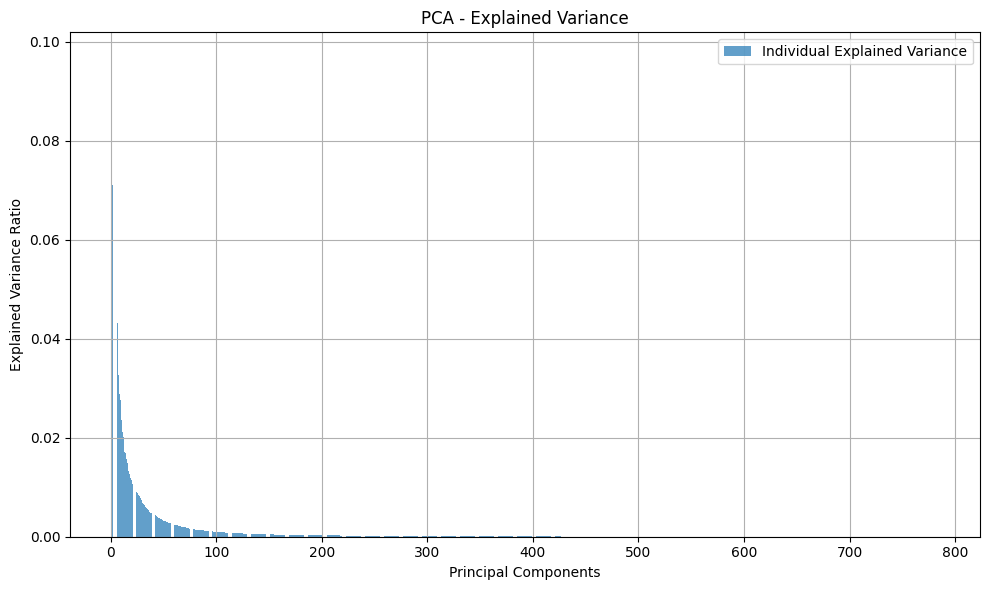

In [6]:
pca = PCA()
pca_components = pca.fit(flattened_data)
explained_variance_ratio = pca_components.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, alpha=0.7, label='Individual Explained Variance')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Key takeaways
- The 95% variance is explained by about 110 components.
- We will proceed with the rest of the process using 110 components.

#### Lets to a t-SNE visualization to check for clusters.

In [84]:


# Reduce the dimensionality to 110 components as per the PCA analysis
pca_110 = PCA(n_components=200)
reduced_data = pca_110.fit_transform(flattened_data)

# Apply t-SNE to the reduced data
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(reduced_data)






/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13

In [51]:
# Dictionary to hold clustering results
clustering_results = {}


# Step 2: KMeans clustering
kmeans = KMeans(n_clusters=10,init='k-means++', n_init=10, random_state=42)
clustering_results['KMeans'] = { 
    'cluster': kmeans.fit_predict(reduced_data),
}

/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-pac

In [16]:
# DBSCAN clustering
dbscan = DBSCAN(eps=20, min_samples=5)
clustering_results['DBSCAN'] = {
    'cluster': dbscan.fit_predict(reduced_data),
}

In [54]:
# Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=10, random_state=42)
clustering_results['GMM'] = {
    'cluster': gmm.fit_predict(reduced_data),
}

/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-pac

In [104]:
# UMAP embedding + HDBSCAN clustering
umap_embed = umap.UMAP(n_components=2, random_state=42).fit_transform(reduced_data)
hdb = hdbscan.HDBSCAN(min_cluster_size=30)
clustering_results['HDBSCAN'] = {
    'cluster': hdb.fit_predict(umap_embed),
}

/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [12]:

# Output dictionary keys (clustering method names)
print("Clustering methods applied:", list(clustering_results.keys()))

Clustering methods applied: ['KMeans', 'DBSCAN', 'GMM', 'HDBSCAN']


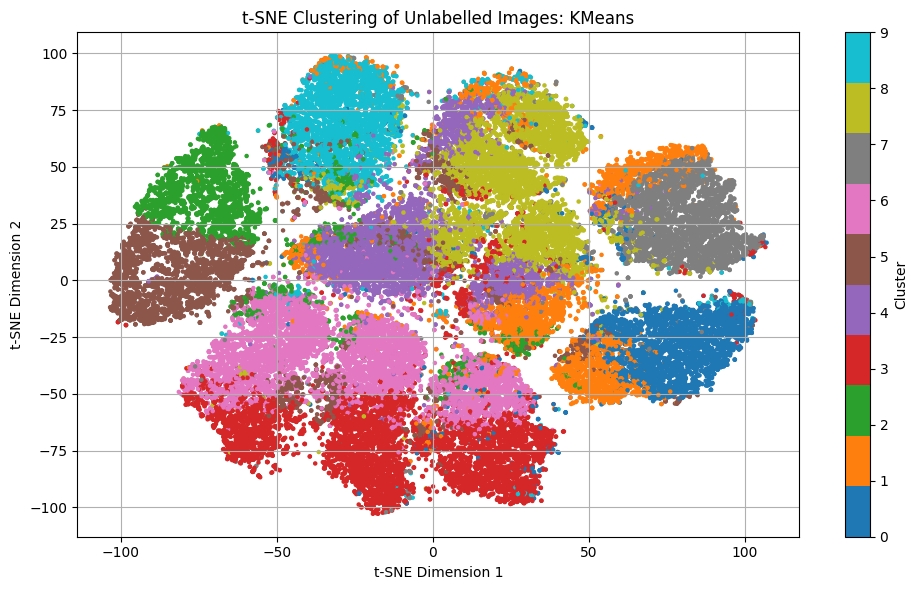

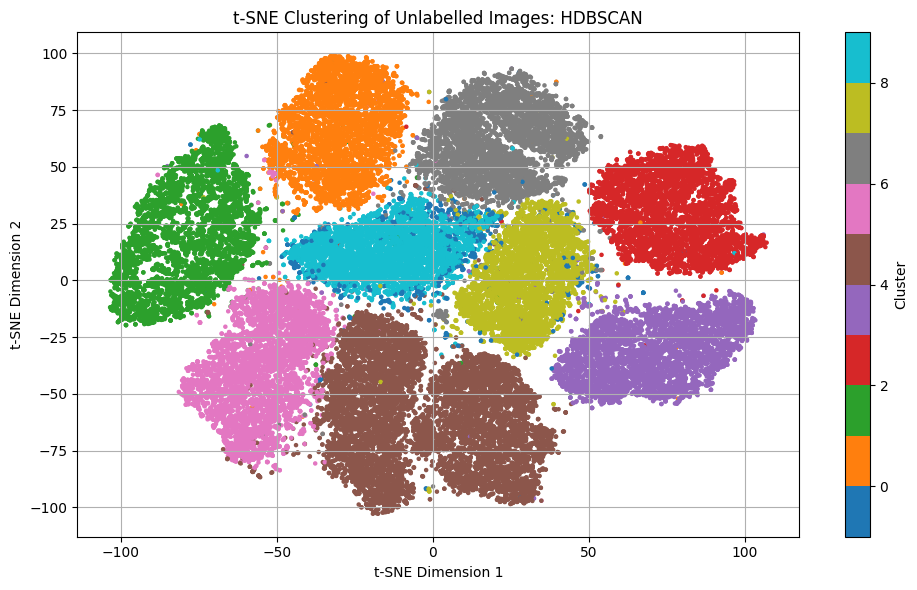

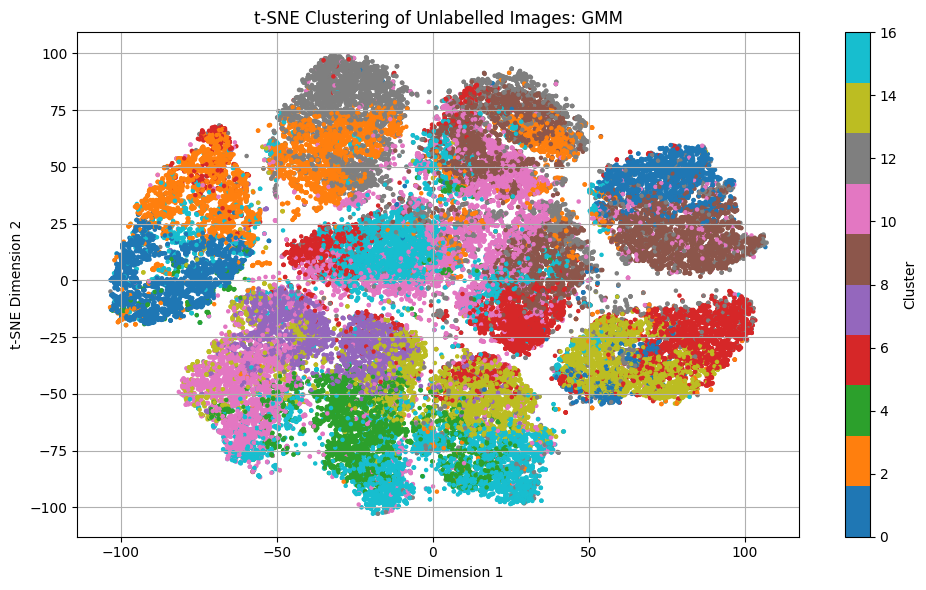

In [105]:
def plot_tsne(tsne_results, cluster, cluseting_method):
       plt.figure(figsize=(10, 6))
       scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=cluster, cmap='tab10', s=5)
       plt.title(f"t-SNE Clustering of Unlabelled Images: {cluseting_method}")
       plt.xlabel("t-SNE Dimension 1")
       plt.ylabel("t-SNE Dimension 2")
       plt.colorbar(scatter, label='Cluster')
       plt.grid(True)
       plt.tight_layout()
       plt.show()

for method, result in clustering_results.items():
    plot_tsne(tsne_results, result['cluster'], method)

### Key takeaways
- It seems HDBScan is giving the best set of clusters

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

5820


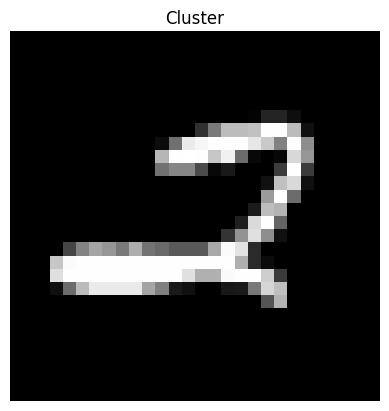

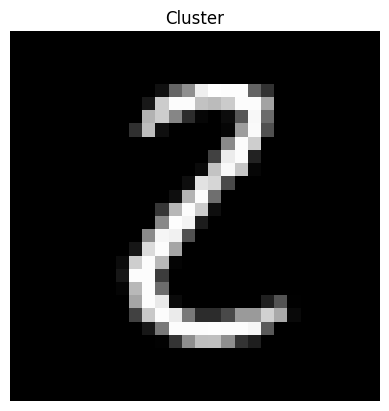

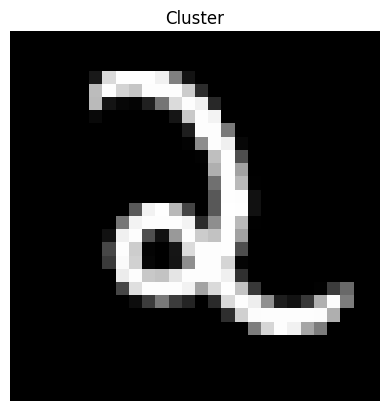

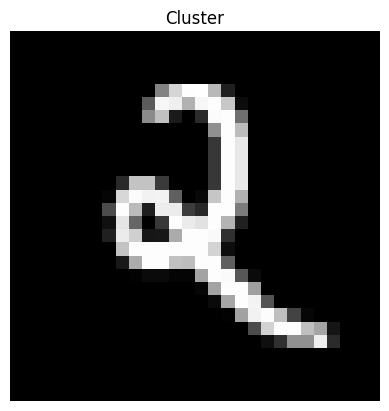

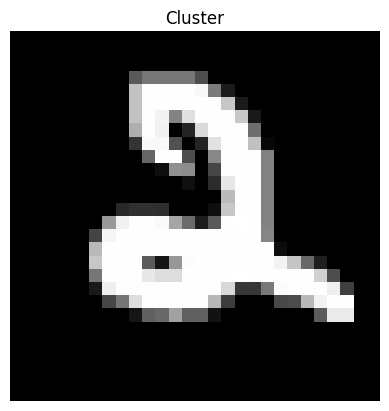

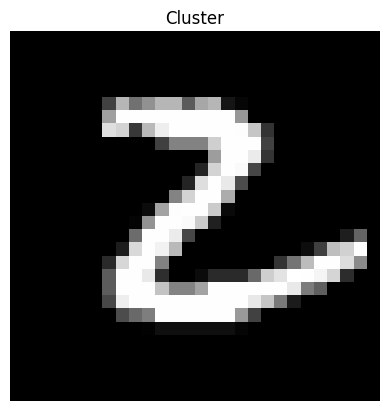

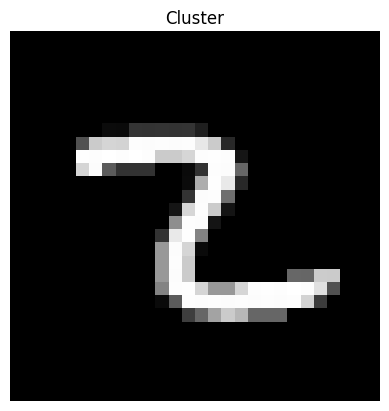

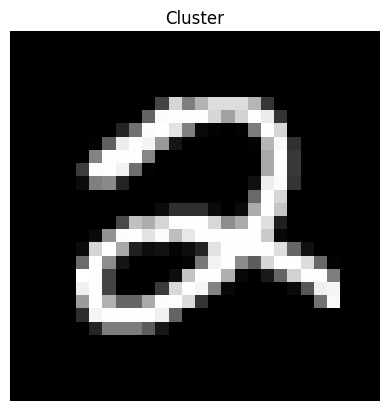

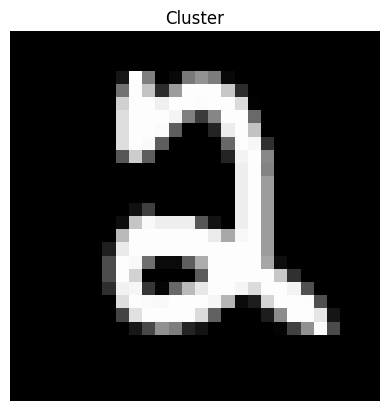

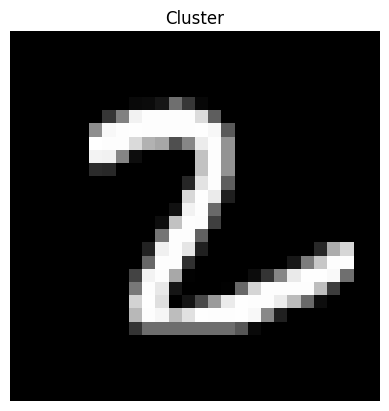

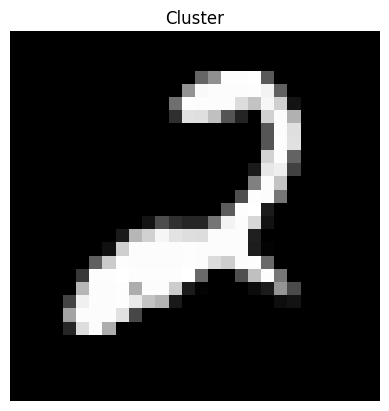

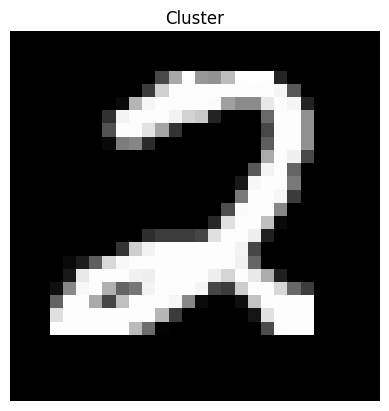

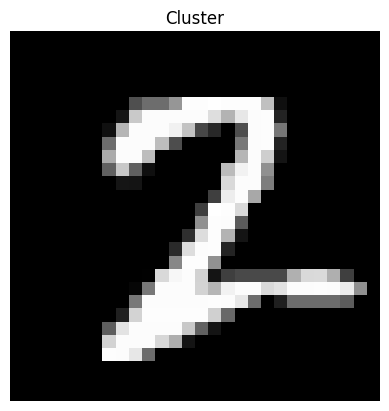

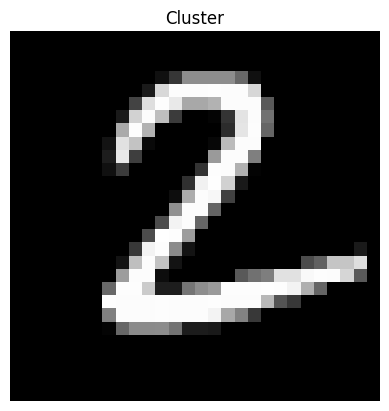

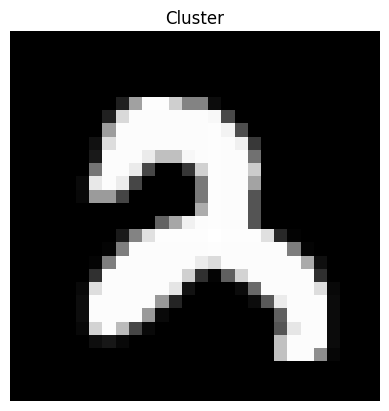

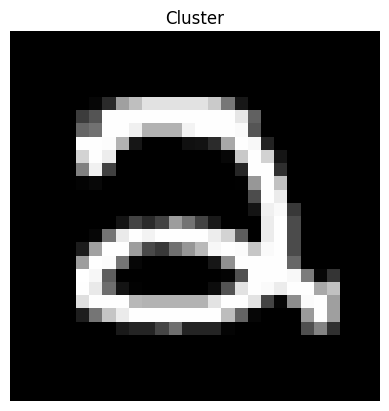

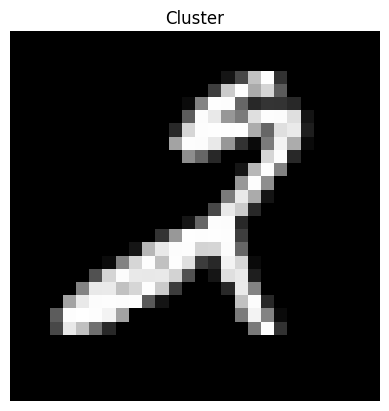

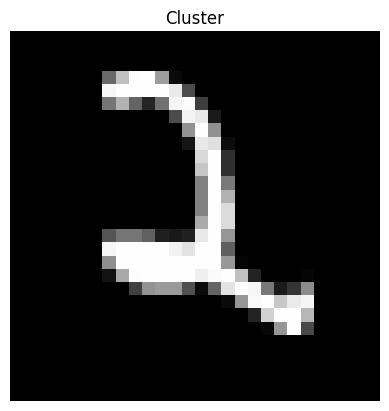

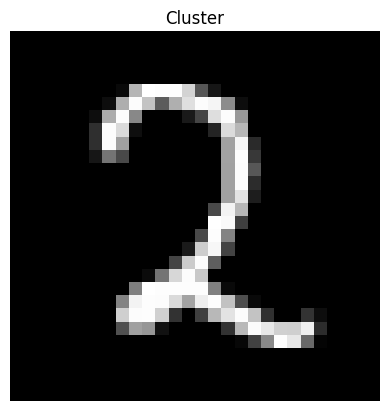

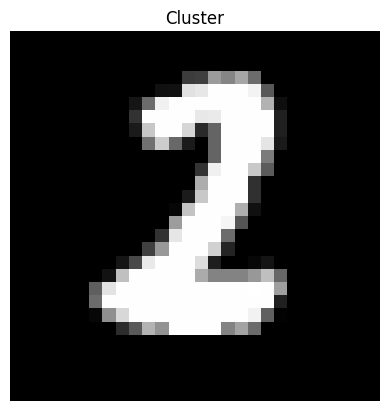

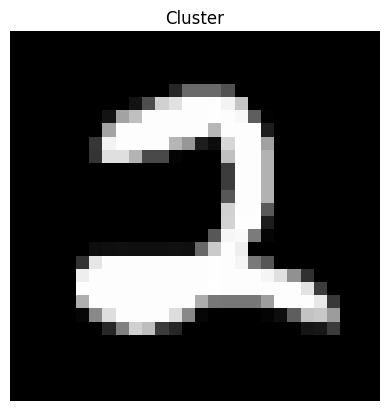

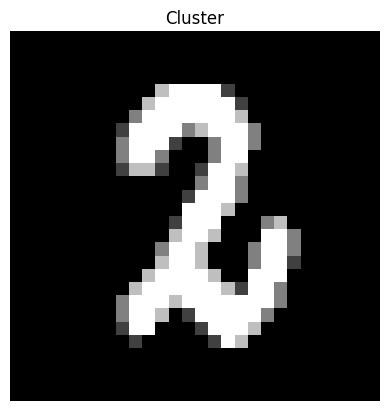

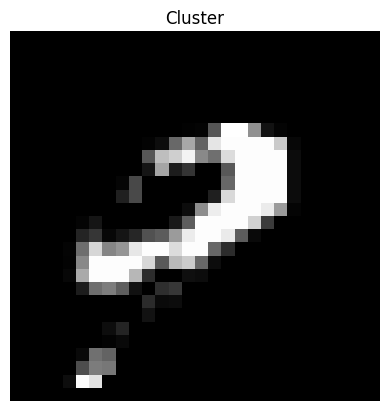

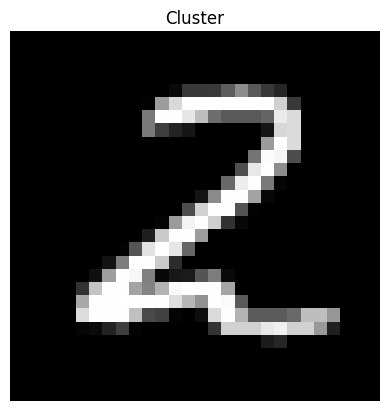

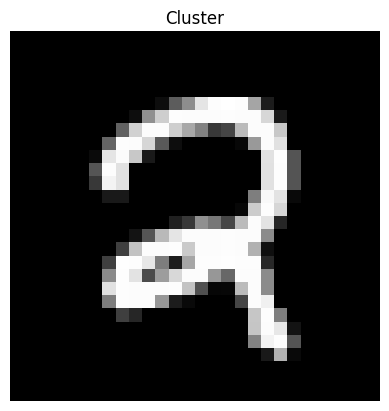

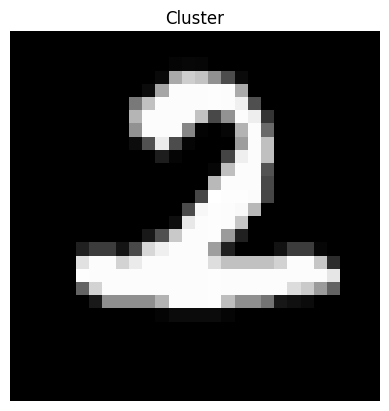

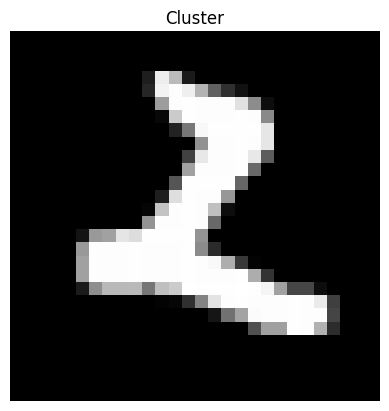

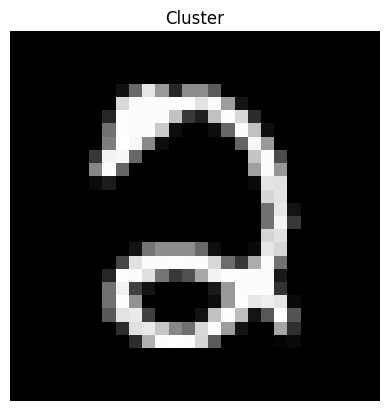

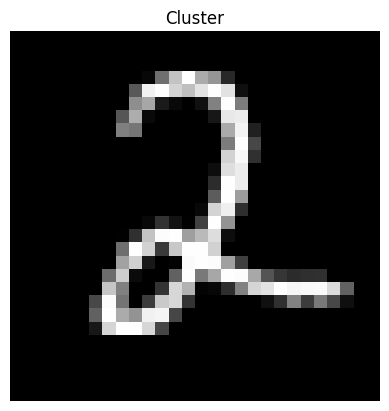

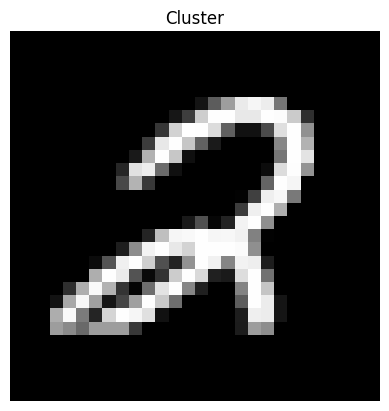

In [147]:
# View images from one cluster (say, cluster 0)
clusters = clustering_results['HDBSCAN']['cluster']
display(np.unique(clusters))

# both clusters -1, 8 and 9 both have similar images
# merging them
clusters[clusters == 9] = 8
clusters[clusters == -1] = 8

cluster_indices = np.where(clusters == 0)[0]

print(len(cluster_indices))


# Visualize first 30 images in cluster
for i in cluster_indices[:30]:
    plt.imshow(data[i][0], cmap='gray') 
    plt.title("Cluster")
    plt.axis('off')
    plt.show()

cluster_labels = {
    "0": "2",
    "1": "1",
    "2": "0",
    "3": "6",
    "4": "9",
    "5": "7",
    "6": "3",
    "7": "5",
    "8": "8",
}

### Key takeaways
- Clusters with indices -1,8, and 9 all had similar images that looked like 8. Have merged them into one cluster.
- Cluster numbered 4 contains images for numbers 4 and 9. we will need to seperate them.

In [132]:
df = pd.DataFrame(flattened_data)
# Add the cluster labels to the DataFrame by mapping the cluster numbers to their corresponding labels in cluster_labels
df['Target'] = np.array([ cluster_labels[str(i)] for i in clusters])

df



,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Dealing with splitting up cluster 4 into 4 and 9

/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([-1,  0,  1,  2])


Subcluster -1 — 2730 samples


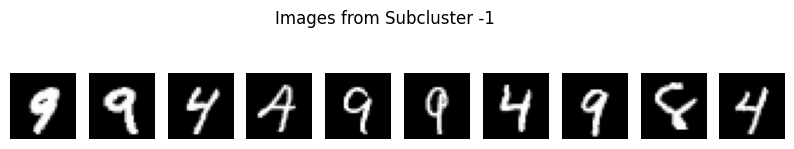


Subcluster 0 — 4110 samples


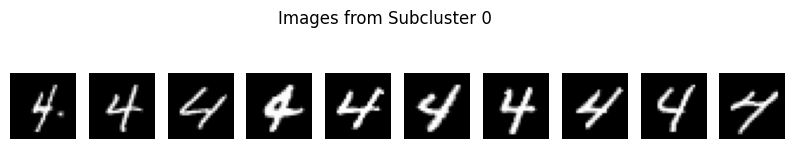


Subcluster 1 — 4592 samples


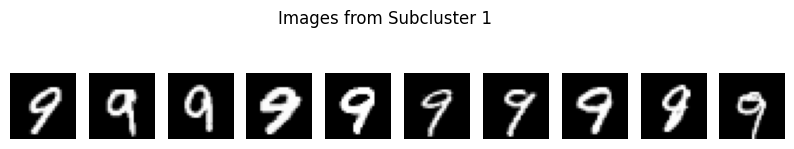


Subcluster 2 — 335 samples


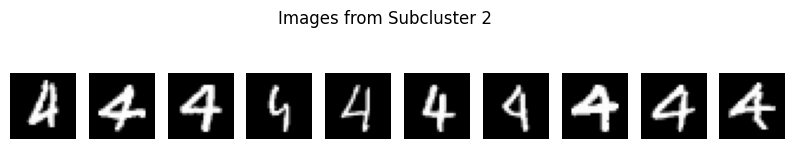

In [139]:
df_ambiguous = df[df['Target'] == '9'].copy()
df_remaining = df[df['Target'] != '9'].copy()

# Drop the 'Target' column from clustering features
X_ambiguous = df_ambiguous.drop(columns='Target')

# Cluster into 2 subgroups (presumably 4 and 9)

umap_embed = umap.UMAP(n_components=10, random_state=42).fit_transform(X_ambiguous)
hdb = hdbscan.HDBSCAN(min_cluster_size=30)
subcluster_labels = hdb.fit_predict(umap_embed)
display(np.unique(subcluster_labels))

# Convert DataFrame to NumPy array if needed
image_data = X_ambiguous.to_numpy()

# Visualize 10 samples from each subcluster
for cluster_id in [-1, 0, 1, 2]:
    indices = np.where(subcluster_labels == cluster_id)[0]
    print(f"\nSubcluster {cluster_id} — {len(indices)} samples")

    plt.figure(figsize=(10, 2))
    for i in range(10):
        img = image_data[indices[i]].reshape(28, 28)
        plt.subplot(1, 10, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Images from Subcluster {cluster_id}")
    plt.show()


In [142]:
cluster_map = {0: "4", 1: "9", -1: "9", 2: "4"}
df_ambiguous['Target'] = [cluster_map[c] for c in subcluster_labels]

# Combine back into the full dataset
df_updated = pd.concat([df_remaining, df_ambiguous]).sort_index()

df_updated

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Split features and labels
X = df_updated.drop(columns='Target').values
y = df_updated['Target'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate models
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Logistic Regression


/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/sujitwarrier/Projects/PMLSolutions/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Users/sujitwa

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1174
           1       0.96      0.97      0.96      1405
           2       0.92      0.91      0.91      1152
           3       0.91      0.91      0.91      1169
           4       0.80      0.82      0.81       872
           5       0.88      0.90      0.89      1075
           6       0.95      0.95      0.95      1192
           7       0.94      0.93      0.94      1302
           8       0.87      0.86      0.87      1166
           9       0.84      0.84      0.84      1493

    accuracy                           0.91     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.91      0.91      0.91     12000

Confusion Matrix:
[[1135    0    6    4    0   10    7    2    8    2]
 [   0 1359   12    4    1    6    1    9   12    1]
 [   6    8 1047   18    5    9   10   12   29    8]
 [   8    2   24 1059    0   35    9    5